In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import setuptools #used to have distutils feature bcz it was removed from python after 3.12 
import pandas_datareader as data
import yfinance as yf

In [2]:
#We are taking the start and end for the amount of data that we need
start = '2010-01-01'
end = '2019-12-31'
#Accessing data and downloading it
df = yf.download('AAPL',start,end)
#Take a look at the data
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440331,6.455077,6.391278,6.422877,493729600
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2010-01-06,6.348848,6.477047,6.342227,6.451467,552160000
2010-01-07,6.337109,6.379842,6.291066,6.372319,477131200
2010-01-08,6.379240,6.379842,6.291368,6.328683,447610800


In [3]:
df = df.reset_index()
#resets the index of the DataFrame. This moves the Date from the index to a regular column and assigns a new integer index.
#Take a look at the first few rows of the data
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.440331,6.455077,6.391278,6.422877,493729600
1,2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2,2010-01-06,6.348848,6.477047,6.342227,6.451467,552160000
3,2010-01-07,6.337109,6.379842,6.291066,6.372319,477131200
4,2010-01-08,6.379240,6.379842,6.291368,6.328683,447610800


In [4]:
#The 'drop' method in pandas is used to drop a row and column, here we are droping the 'Date' and 'Adj Close' column
#use index 1 for droping column and 0 for dropping row
print(df.columns)
df = df.drop([('Date', '')], axis=1)
#Take a look at the first few rows of new data
df.head()

MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


C:\Users\paras\AppData\Local\Temp\ipykernel_7556\2284132358.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455077,6.391278,6.422877,493729600
1,6.451466,6.487879,6.417460,6.458087,601904800
2,6.348848,6.477047,6.342227,6.451467,552160000
3,6.337109,6.379842,6.291066,6.372319,477131200
4,6.379240,6.379842,6.291368,6.328683,447610800


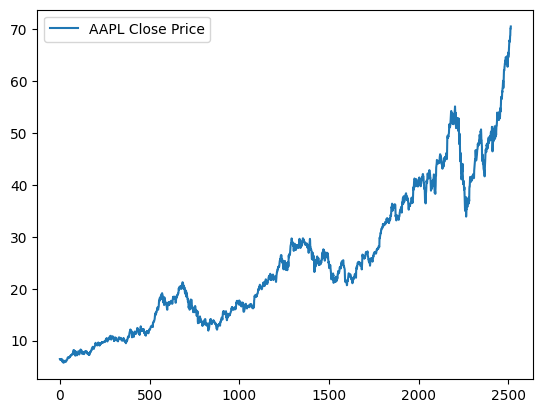

In [5]:
#plt.plot() is used to create 2D line plots ,this function can be used to plot data points and lines
#It can be used to customize the appearance of the plot, and add multiple lines to the same plot.

#Drawing the graph of the close column of the data
#The 'label' parameter is used to set the label for the line being plotted ,this label can then be displayed in the plot's legend
 
plt.plot(df.Close, label='AAPL Close Price')

#The plt.legend() function in matplotlib is used to add a legend to a plot. A legend provides an explanation of the elements of the plot.
#It labels the plotted data (lines, markers, etc.) with their associated names or descriptions, making it easier to understand the plot.

plt.legend()
#We can also use plt.plot(df['Close']) to get the graph 

In [6]:
#Take a look at the whole data
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455077,6.391278,6.422877,493729600
1,6.451466,6.487879,6.417460,6.458087,601904800
2,6.348848,6.477047,6.342227,6.451467,552160000
3,6.337109,6.379842,6.291066,6.372319,477131200
4,6.379240,6.379842,6.291368,6.328683,447610800
...,...,...,...,...,...
2510,68.757645,68.818171,67.878805,67.917542,98572000
2511,68.823036,68.973147,68.496201,68.924723,48478800
2512,70.188499,70.205449,68.927137,68.956189,93121200


In [7]:
#Moving avg is basically the avg of some particular timeframe

#'df.Close.rolling(100)' creates a rolling window of size 100 over the 'Close' column of the DataFrame df.
#'.mean()' computes the mean (average) of each window.

ma100 = df.Close.rolling(100).mean()

#'ma100' is a pandas Series where each value represents the average of the 'Close' prices over the last 100 days.
#Each value represents the average of the 'Close' prices over the preceding 100 days.
#Initially, the first 99 values will be NaN (Not a Number) because there aren't enough preceding values to calculate the average.

#Take a look at the 100-days moving avg data 
ma100[97:105]

Ticker,AAPL
97,NaN
98,NaN
99,6.817789
100,6.829628
101,6.842418
102,6.857422
103,6.873483
104,6.888873


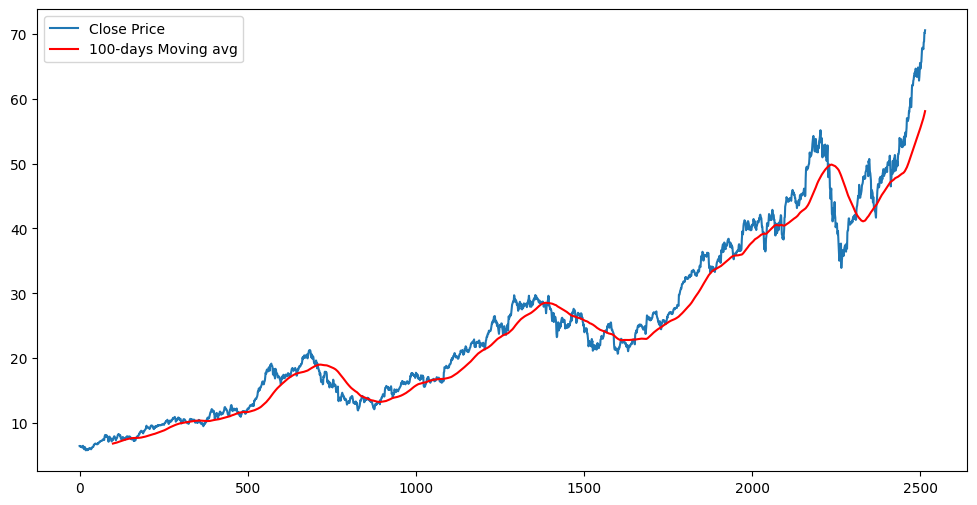

In [8]:
#Deciding the size of the graph figure x,y = 12,6
plt.figure(figsize=(12,6))

#Plotting the graph of 'Close' column in the dataframe
plt.plot(df.Close, label = 'Close Price')

#Plotting the graph of moving avg of 100 elements on top of the graph of 'Close' column
plt.plot(ma100,'r', label = '100-days Moving avg')
plt.legend()
#The x-axis represents the the index of the DataFrame(corresponds to the sequential order of the data points in the DataFrame.)


In [9]:
#Calculating the moving average of 200 days subset so we will not get anything for first 199 days but after thatwe will get some value of moving average

ma200 = df.Close.rolling(200).mean()

#Take a look at the data
ma200[197:205]

Ticker,AAPL
197,NaN
198,NaN
199,7.387423
200,7.401790
201,7.416257
202,7.431086
203,7.445665
204,7.460239


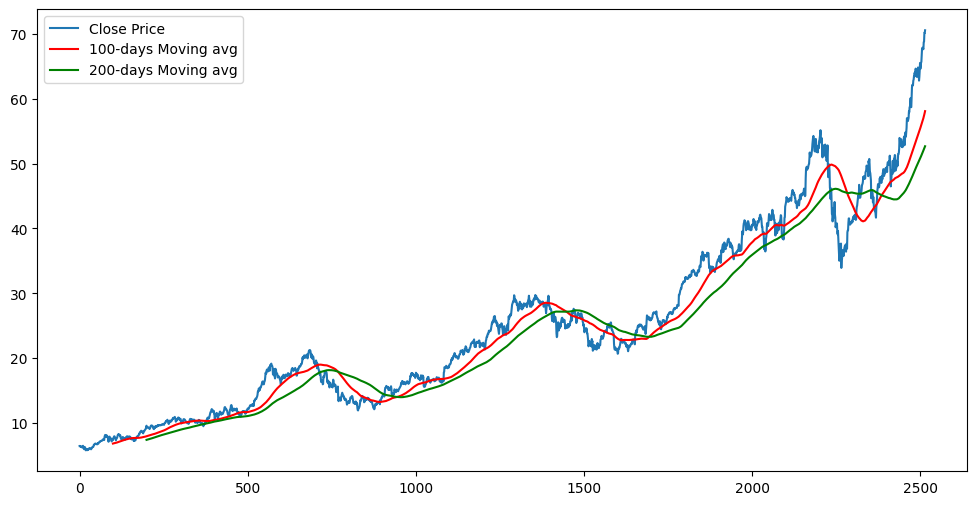

In [10]:
plt.figure(figsize=(12,6))
#Plotting the graph of 'Close' column , 100 days moving avg and 200 days moving avg on top of each other
plt.plot(df.Close, label = "Close Price")
plt.plot(ma100, 'r', label = '100-days Moving avg')
plt.plot(ma200, 'g', label = '200-days Moving avg')
plt.legend()

In [11]:
#In pandas, the shape attribute of a DataFrame or Series is used to get the dimensions of the data structure.
#It returns a tuple representing the number of rows and columns.
df.shape

(2515, 5)

In [12]:
df[1758:1765]

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1758,27.119143,27.244030,26.941061,26.947999,73187600
1759,27.003504,27.294907,26.873989,27.179270,83623600
1760,26.996567,27.084450,26.920246,26.931809,60158000
1761,26.786104,27.105261,26.695908,26.978062,122345200
1762,26.862425,26.904054,26.540955,26.781479,115127600
1763,26.832357,26.945683,26.769914,26.793041,84472400
1764,26.968811,27.026629,26.783791,26.809232,88774400


In [13]:
#Spliting the Close column data into 70% training and 30% testing
#We are spliting it using pandas DataFrame so both data_training and data_testing will be DataFrames of different sizes

#Selects the first 70% of the data of 'Close' column of df for training
data_training = pd.DataFrame(df['Close'][0: int(len(df)*0.70)])

#Selects the remaining 30% of the data of 'Close' column of df for testing
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) :int(len(df))])

print(data_training.shape, data_testing.shape)

(1760, 1) (755, 1)


In [14]:
#Take a look at the training data
data_training.tail()

Ticker,AAPL
1755,27.072886
1756,26.894806
1757,26.947998
1758,27.119143
1759,27.003504


In [15]:
#Take a look at the testing data
data_testing.head()

Ticker,AAPL
1760,26.996567
1761,26.786104
1762,26.862425
1763,26.832357
1764,26.968811


In [16]:
'''A stacked LSTM (Long Short-Term Memory) model is a type of recurrent neural network (RNN) that involves multiple LSTM
 layers arranged sequentially (stacked) on top of each other. This architecture allows the model to learn more complex patterns 
 in sequential data by processing the data through several layers of memory cells.'''
#To prepare the data for a Stack LSTM model, it is necessary to scale the data to a range between 0 and 1.
#For the Stack LSTM Model we need to scale down the data we can't provide this data directly so we will be scaling down the data
#btw 0 and 1 using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
#Scaling down the training data and it gives an array as the output 
#The output of scaler.fit_transform() is a NumPy array
'''When we apply it to our data using a scaler like MinMaxScaler, it scales the data according to the specified range 
and returns the transformed data as a NumPy array'''
data_training_array = scaler.fit_transform(data_training)

data_training_array
#It is a 2D array having 1760 rows and 1 column
# [[0.2913],[0.2890],......,[0.39193]]

array([[0.02760003],
       [0.02806508],
       [0.02377932],
       ...,
       [0.88408439],
       [0.89123209],
       [0.88640254]])

In [18]:
data_training_array.shape

(1760, 1)

In [19]:
'''To prepare the training data for a time series prediction model like LSTM, we need to create sequences of 
past observations to predict future values.So, by this code we are preparing the training data in the form of sequences and 
corresponding target values, ready to fed into an LSTM model for time series prediction.'''
#Here we are preparing training data for a time series prediction model i.e. LSTM(Long Short-Term Memory) Model
#Creating 2 empty list x_train and y_train to store the input sequences and corresponding target values.
x_train, y_train = [], []

for i in range(100, data_training_array.shape[0]):
    #Appending 100 days data in the x_train to predict the data of next day bcz it will depend on the data of these days
    #This 100 days data set is our input sequence
    x_train.append(data_training_array[i-100:i])
    
    #Appending the data of day after 100 days set in the y_train, this value represents the target to predict
    #As data_training_array is a 2D array so we are appending the i-th row and 0th column of the array into y_train
    y_train.append(data_training_array[i, 0])

#Converting x_train and y_train into NumPy arrays 
#for efficient computation and to be compatible with machine learning models we require NumPy arrays as input.
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train
#array([[[1],[2],...,[100]],[[2],[3],...,[101]],...]])
#Its a 3D array

array([[[0.02760003],
        [0.02806508],
        [0.02377932],
        ...,
        [0.0687613 ],
        [0.06682573],
        [0.06543059]],

       [[0.02806508],
        [0.02377932],
        [0.02328904],
        ...,
        [0.06682573],
        [0.06543059],
        [0.07704379]],

       [[0.02377932],
        [0.02328904],
        [0.02504862],
        ...,
        [0.06543059],
        [0.07704379],
        [0.0814805 ]],

       ...,

       [[0.7697469 ],
        [0.7759935 ],
        [0.79146465],
        ...,
        [0.88823748],
        [0.8893002 ],
        [0.88186287]],

       [[0.7759935 ],
        [0.79146465],
        [0.80001729],
        ...,
        [0.8893002 ],
        [0.88186287],
        [0.88408439]],

       [[0.79146465],
        [0.80001729],
        [0.80424565],
        ...,
        [0.88186287],
        [0.88408439],
        [0.89123209]]])

In [21]:
y_train
#its a 1D array

array([0.07704379, 0.0814805 , 0.08644477, ..., 0.88408439, 0.89123209,
       0.88640254])

In [22]:
x_train.shape

(1660, 100, 1)

#ML Model

In [23]:
#keras is now a part of tensorflow 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [24]:
'''This code builds an LSTM model for time series prediction with multiple LSTM layers and dropout layers for regularization.'''

#Define a 'sequential' model, it intializes the sequential model.
model = Sequential()

'''Units: The number of neurons in a layer(Neuron is basically the basic computational unit in the neural network,Each neuron 
receives input, processes it, and produces an output. The output is often determined by an activation function.In a Dense layer, 
neurons are fully connected to all neurons in the previous layer.). In an LSTM layer, units specifies the number of LSTM cells in the 
layer.EX=> 'units=50' means the layer has 50 LSTM cells.'''

'''ReLU(Rectified Linear Unit): An activation function that outputs the input directly if it is positive; otherwise,it will 
output zero.It is introduced to help models learn nonlinear patterns by adding nonlinearity to the model. ReLU(x)=max(0,x)
Ex=> activation='relu' in an LSTM layer applies the ReLU activation function to the outputs of the LSTM cells.'''

'''Return Sequences: A parameter in LSTM layers that controls whether to return the last output in the output sequence or the 
full sequence. Determines the shape of the output from the LSTM layer. Here, we have taken 'return_sequence=True' which means
that it will return the full sequence(used while stakcing the LSTM layers)'''

'''Input_Shape: refers to the shape(dimensions) of the input data that is fed into the model.'''

'''Dropout:  A regularization technique to prevent overfitting by randomly setting a fraction of input units to zero at each 
update during training time.: It improves model generalization by preventing complex co-adaptations on training data.
The dropout rate (a float between 0 and 1) indicates the fraction of the input units to drop.Ex=> Dropout(0.2) means that 20% of 
the input units will be set to zero during each update.'''

#Adds the first LSTM layer with 50 units and ReLU activation. 
#The return_sequences=True argument ensures that the output of this layer will be 3D, which is necessary for stacking more LSTM layers.
# '1' is used bcz we are working on only 1 column i.e. 'Close' column
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

'''Dense: A fully connected neural network layer where each neuron receives input from all the neurons in the previous layer.
It provides the final output for the LSTM. Its parameter is the number of output units(neurons) in the layer.Ex=> 'Dense(units=1)'
creates a layer with a single neuron, typically used for regression tasks to predict a single continuous value.'''
model.add(Dense(units = 1))


C:\Users\paras\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
'''The model.summary() function in Keras provides a textual summary of the neural network model, including details about each layer,
the number of parameters in each layer, and the overall structure of the model. '''
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Adam is an optimization algorithm that adapts learning rates for each parameter, aiming to improve training speed and performance.
#Mean Squared Loss(MSE) is a common loss function for regression takes
#it computes the avg of the squared differences btw predicted and actual values.
model.compile(optimizer='adam', loss='mean_squared_error') #compiles the model

#x_train--> Input data(Numpy array) , y_train--> Target data(Numpyy array)
#epoches= 50: means 50 number of epochs (iterations over the entire dataset) to train the model
model.fit(x_train, y_train, epochs=50) #Trains the model on the given training data

'''During training, the model adjusts its weights based on the gradient descent optimization process, aiming to minimize the MSE 
between predicted and actual outputs.'''

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - loss: 0.1272
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 0.0124
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 0.0117
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 0.0094
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - loss: 0.0086
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 0.0082
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - loss: 0.0083
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - loss: 0.0076
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 0.0078
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 0.0075
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - loss: 0.0071
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - loss: 0.0073
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - loss: 0.0065
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - loss: 0.0070
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 2

'During training, the model adjusts its weights based on the gradient descent optimization process, aiming to minimize the MSE \nbetween predicted and actual outputs.'

In [27]:
#Saving the keras model, it allows us to serialize the model architecture, weight, and configuration into a single HDF5 file.
#HDF5 files are used to store large amount of numerical data 
model.save("keras_model.h5")

In [28]:
data_testing.head()

Ticker,AAPL
1760,26.996567
1761,26.786104
1762,26.862425
1763,26.832357
1764,26.968811


In [29]:
#Taking past 100 days data from the data training 
past_100_days = data_training.tail(100)
past_100_days

Ticker,AAPL
1660,24.935095
1661,25.036339
1662,24.849958
1663,24.833851
1664,24.891375
...,...
1755,27.072886
1756,26.894806
1757,26.947998
1758,27.119143


In [30]:
#concatenating 2 DataFrames past_100_days and data_testing into a single dataframe final_df using pandas function 'pd.concat()'
#ignore_index=True: If set to True, it will ignore the original index labels and create a new integer index for the concatenated DataFrame
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [31]:
final_df

Ticker,AAPL
0,24.935095
1,25.036339
2,24.849958
3,24.833851
4,24.891375
...,...
850,68.757645
851,68.823036
852,70.188499
853,70.161858


In [32]:
#scaling the final_df data in the range 0 to 1 using MinMaxScaler
#It will give a numpy array as its output 
input_data = scaler.fit_transform(final_df)

#Take a look at the data, 2D array
input_data

array([[0.02573549],
       [0.02789657],
       [0.02391824],
       [0.02357442],
       [0.02480227],
       [0.03118722],
       [0.03069606],
       [0.0299101 ],
       [0.02922263],
       [0.03059774],
       [0.02642305],
       [0.02809297],
       [0.02406554],
       [0.02180634],
       [0.01871229],
       [0.01812289],
       [0.01409542],
       [0.01458674],
       [0.01768075],
       [0.02259226],
       [0.022445  ],
       [0.02568635],
       [0.01173815],
       [0.        ],
       [0.01134515],
       [0.02367282],
       [0.04243417],
       [0.0610974 ],
       [0.05790495],
       [0.05132373],
       [0.05127459],
       [0.05117639],
       [0.05643155],
       [0.04705096],
       [0.0478857 ],
       [0.04891711],
       [0.05314098],
       [0.04444778],
       [0.04872063],
       [0.04611762],
       [0.04847505],
       [0.04872063],
       [0.05284626],
       [0.05368132],
       [0.06345504],
       [0.06468265],
       [0.0697904 ],
       [0.068

In [33]:
#Finding out the number of rows and colums of the 2D numpy array input_data
input_data.shape

(855, 1)

In [34]:
# x_test and y_test are initialized as empty lists to store sequences of input data 'x_test' and corresponding target values 'y_test'
x_test, y_test = [], []


#input_data.shape[0] represents the total number of rows (or samples) in the scaled input data 'input_data'
for i in range(100, input_data.shape[0]):
    #We are appending the 100 step data set into the x_test from the input_data 
    x_test.append(input_data[i-100: i])

    #'input_data[i, 0]' fetches the target value from the ith row and 1st column (usually the next time step's value) and appends it to y_test.
    y_test.append(input_data[i, 0])

#Converting the x_test and y_test into numpy arrays for efficient computation and compatibility with machine learning models.
x_test, y_test = np.array(x_test), np.array(y_test)

#Printing the shape of the x_test and y_test
print(x_test.shape, y_test.shape)

(755, 100, 1) (755,)


In [35]:
x_test
#Its a 3D array

array([[[0.02573549],
        [0.02789657],
        [0.02391824],
        ...,
        [0.06870137],
        [0.07235449],
        [0.06988616]],

       [[0.02789657],
        [0.02391824],
        [0.02357442],
        ...,
        [0.07235449],
        [0.06988616],
        [0.06973808]],

       [[0.02391824],
        [0.02357442],
        [0.02480227],
        ...,
        [0.06988616],
        [0.06973808],
        [0.06524571]],

       ...,

       [[0.48586655],
        [0.50465258],
        [0.5151235 ],
        ...,
        [0.93757296],
        [0.96113785],
        [0.96253365]],

       [[0.50465258],
        [0.5151235 ],
        [0.53765665],
        ...,
        [0.96113785],
        [0.96253365],
        [0.99167977]],

       [[0.5151235 ],
        [0.53765665],
        [0.52905216],
        ...,
        [0.96253365],
        [0.99167977],
        [0.99111109]]])

Making Predictions

In [36]:
#Generating the predictions for the test input data sequence using trained LSTM Model 
y_predicted = model.predict(x_test)

#The output y_predicted is basically a Numpy array(2D) containing the predicted values.
'''The predictions are based on the learned patterns and relationships in the training data. These predictions are used to 
compare against the actual values (y_test) to evaluate model performance.'''

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step


'The predictions are based on the learned patterns and relationships in the training data. These predictions are used to \ncompare against the actual values (y_test) to evaluate model performance.'

In [37]:
y_predicted.shape

(755, 1)

In [38]:
#Take a look at the actual values
y_test

array([0.06973808, 0.06524571, 0.06687479, 0.066233  , 0.06914563,
       0.07556323, 0.08089477, 0.08148727, 0.0846465 , 0.08217828,
       0.08114149, 0.08588058, 0.08583128, 0.08479457, 0.08588058,
       0.08627566, 0.08573267, 0.09516151, 0.09545762, 0.09550704,
       0.0939273 , 0.09254498, 0.12907592, 0.12798962, 0.13070488,
       0.13667822, 0.14279955, 0.14531719, 0.15002717, 0.14853977,
       0.15434065, 0.16291786, 0.16534748, 0.16455423, 0.16638846,
       0.17124745, 0.17328016, 0.17040449, 0.17104918, 0.17238786,
       0.17268531, 0.18656776, 0.18245267, 0.18651801, 0.18433629,
       0.18522904, 0.18265094, 0.1810642 , 0.18334502, 0.18364254,
       0.18260136, 0.18988927, 0.19102996, 0.18755928, 0.19484736,
       0.1868157 , 0.19464909, 0.19217016, 0.19078194, 0.19197206,
       0.20644912, 0.2080357 , 0.2070936 , 0.20575488, 0.2059534 ,
       0.21125852, 0.2075399 , 0.20575488, 0.20416855, 0.20332571,
       0.19569027, 0.19653319, 0.19281481, 0.19668204, 0.19355

In [39]:
#Take a look at the predicted data
y_predicted

array([[0.14448342],
       [0.14505419],
       [0.14559513],
       [0.146086  ],
       [0.14651617],
       [0.14687964],
       [0.14718309],
       [0.14744839],
       [0.14770383],
       [0.14797206],
       [0.14827202],
       [0.1486076 ],
       [0.14897645],
       [0.14937982],
       [0.14981282],
       [0.15026629],
       [0.15073133],
       [0.15119828],
       [0.15166305],
       [0.15213741],
       [0.15261763],
       [0.15310812],
       [0.15360469],
       [0.15412718],
       [0.15474737],
       [0.15551594],
       [0.15644863],
       [0.1575632 ],
       [0.15888265],
       [0.16041496],
       [0.16215694],
       [0.16409324],
       [0.16621488],
       [0.16851695],
       [0.17094392],
       [0.17349207],
       [0.17614669],
       [0.17888665],
       [0.18167987],
       [0.18448733],
       [0.18727043],
       [0.18998845],
       [0.1926245 ],
       [0.19516763],
       [0.19761217],
       [0.19995144],
       [0.20217815],
       [0.204

In [40]:
'''The MinMaxScaler from sklearn.preprocessing has an attribute called scale_, which contains the scaling factors used to scale
each feature. This attribute is a NumPy array where each value represents the factor by which the corresponding feature (column) 
in the input data was scaled.'''
scaler.scale_

array([0.02134523])

In [41]:
'''Since the model predictions are scaled (because the input data was scaled using MinMaxScaler), we need to inverse transform 
the predictions and actual values to interpret them in their original scale.'''

#The scale factor is given by the inverse of the scaling factor used during the scaling process.
scale_factor = 1/0.02123255 #(=47.0974988873216)

#Multiplying y_predicted and y_test with scale_factor to revert the scaling
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

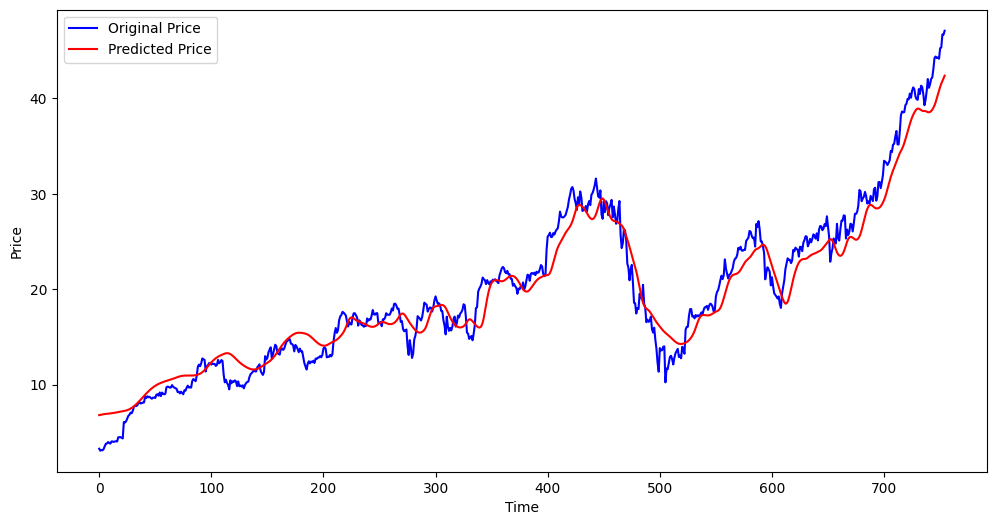

In [42]:
#Plotting the graph of the original and predicted stock price on top of each other to check the performance of our LSTM Model.
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = "Original Price")
plt.plot(y_predicted, 'r', label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()